In [3]:
import pandas as pd

# Load the dataset
df = pd.read_excel('dataset.xlsx')

In [4]:
# Simple data exploration
print("Missing Values:\n", df.isnull().sum())
print("\n")

print("Summary Statistics:\n", df.describe())
print("\n")

print("First Few Rows:\n", df.head())
print("\n")

print("Unique Values:\n", df.nunique())

Missing Values:
 Business Area       0
Country             0
Product Name        0
Customer Segment    0
Industry Segment    0
Cost per Unit       0
Units Sold          0
Total Sales         0
dtype: int64


Summary Statistics:
        Cost per Unit     Units Sold   Total Sales
count   81042.000000   81042.000000  8.104200e+04
mean     2098.570769      89.182257  2.399266e+05
std      3548.281664    1265.806106  3.711991e+06
min         2.008712       0.500000 -1.107862e+03
25%      1123.027270       1.000000  4.659294e+03
50%      1707.192572       4.000000  1.462830e+04
75%      2541.177183      19.500000  6.427470e+04
max    535950.037533  277320.500000  8.548105e+08


First Few Rows:
   Business Area Country                                       Product Name  \
0        Africa  Angola  Household goods, personal effects, not for res...   
1        Africa  Angola  Machinery or mechanical appliances, new per un...   
2        Africa  Angola         Pastry, bread, cake, non-frozen, foo

In [5]:
total_sales = df['Total Sales'].sum()
total_units_sold = df['Units Sold'].sum()
total_cost = (df['Units Sold'] * df['Cost per Unit']).sum()
avg_sales_per_unit = total_sales / total_units_sold
# Calculate profit margin
df['Profit Margin'] = ((df['Total Sales'] - (df['Units Sold'] * df['Cost per Unit'])) / df['Total Sales']) * 100


In [6]:
# Top 5 insights
top_continents = df.groupby('Business Area')['Total Sales'].sum().nlargest(5).index.tolist()
top_countries = df.groupby('Country')['Total Sales'].sum().nlargest(5).index.tolist()
top_products = df.groupby('Product Name')['Total Sales'].sum().nlargest(5).index.tolist()
top_customer_groups = df.groupby('Customer Segment')['Total Sales'].sum().nlargest(5).index.tolist()
avg_sales_per_customer_type = df.groupby('Customer Segment')['Total Sales'].mean().nlargest(5)

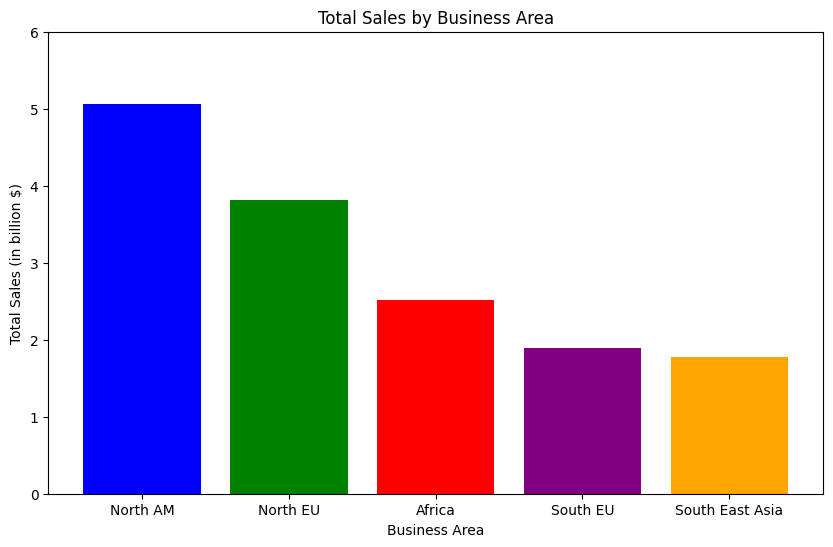

In [34]:
# Insight 1 visualization
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'red', 'purple', 'orange']
plt.bar(top_continents, df.groupby('Business Area')['Total Sales'].sum().loc[top_continents], color=colors)
plt.xlabel('Business Area')
plt.ylabel('Total Sales (in billion $)')
plt.title('Total Sales by Business Area')
plt.yticks([0e9, 1e9, 2e9, 3e9, 4e9, 5e9, 6e9], ['0', '1', '2', '3', '4', '5', '6'])
plt.savefig('insight1.png')
plt.show()

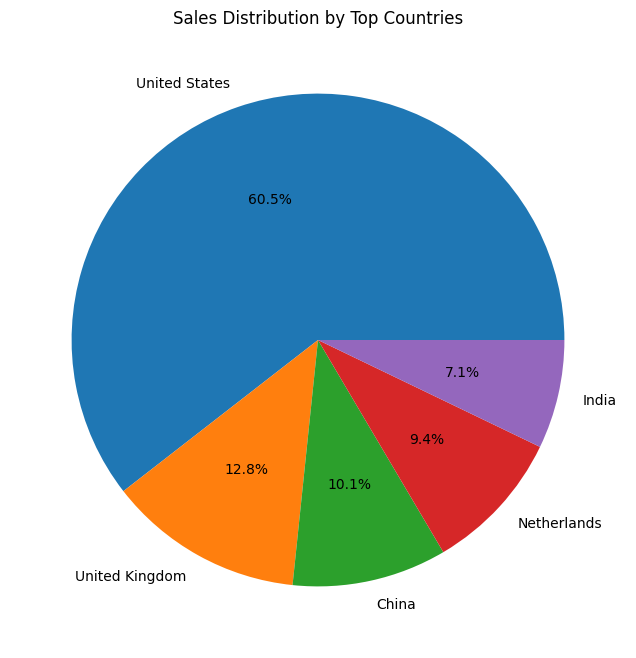

In [35]:
# Insight 2 visualization
top_countries_sales = df.groupby('Country')['Total Sales'].sum().loc[top_countries]
plt.figure(figsize=(8, 8))
plt.pie(top_countries_sales, labels=top_countries, autopct='%1.1f%%')
plt.title('Sales Distribution by Top Countries')
plt.savefig('insight2.png')
plt.show()

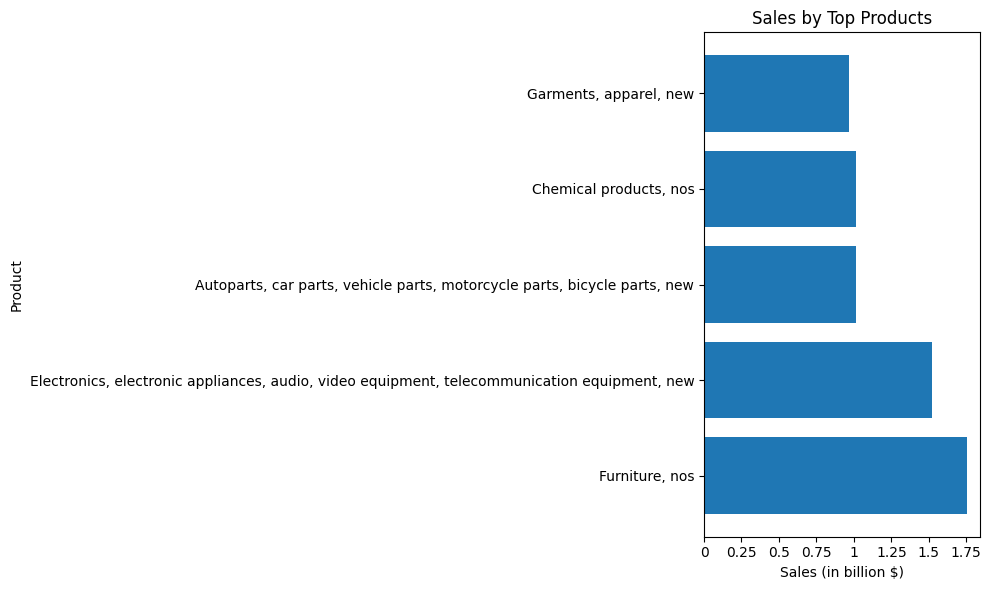

In [40]:
# Insight 3 visualization
plt.figure(figsize=(10, 6))
plt.barh(top_products, df.groupby('Product Name')['Total Sales'].sum().loc[top_products])
plt.xlabel('Sales (in billion $)')
plt.ylabel('Product')
plt.title('Sales by Top Products')
plt.xticks([0.00e9, 0.25e9, 0.50e9, 0.75e9, 1.00e9, 1.25e9, 1.50e9, 1.75e9], ['0', '0.25', '0.5', '0.75', '1', '1.25', '1.5', '1.75'])
plt.tight_layout()  # Adjust the layout
plt.savefig('insight3.png', bbox_inches='tight')  # Save the figure with tight bounding box
plt.show()

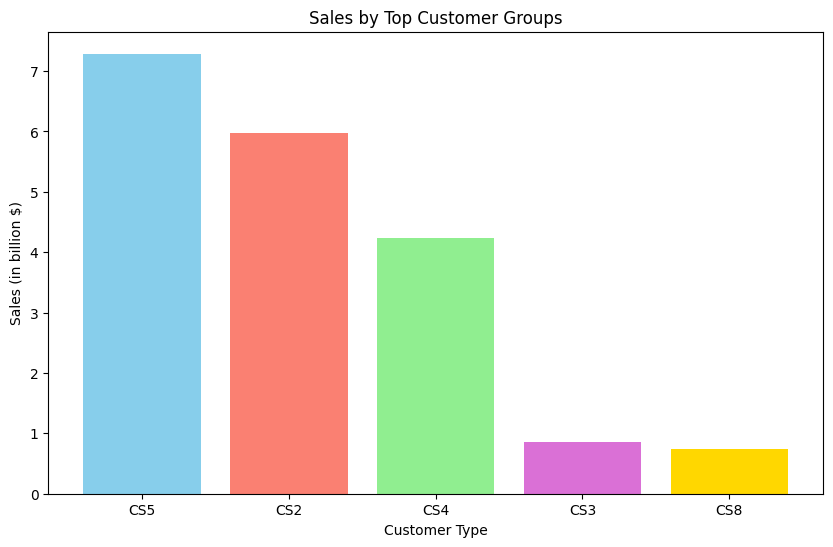

In [37]:
# Insight 4 visualization
top_customer_groups_sales = df.groupby('Customer Segment')['Total Sales'].sum().loc[top_customer_groups]
colors = ['skyblue', 'salmon', 'lightgreen', 'orchid', 'gold']
plt.figure(figsize=(10, 6))
plt.bar(top_customer_groups, top_customer_groups_sales, color=colors)
plt.xlabel('Customer Type')
plt.ylabel('Sales (in billion $)')
plt.title('Sales by Top Customer Groups')
plt.yticks([0e9, 1e9, 2e9, 3e9, 4e9, 5e9, 6e9, 7e9], ['0', '1', '2', '3', '4', '5', '6', '7'])
plt.savefig('insight4.png')
plt.show()

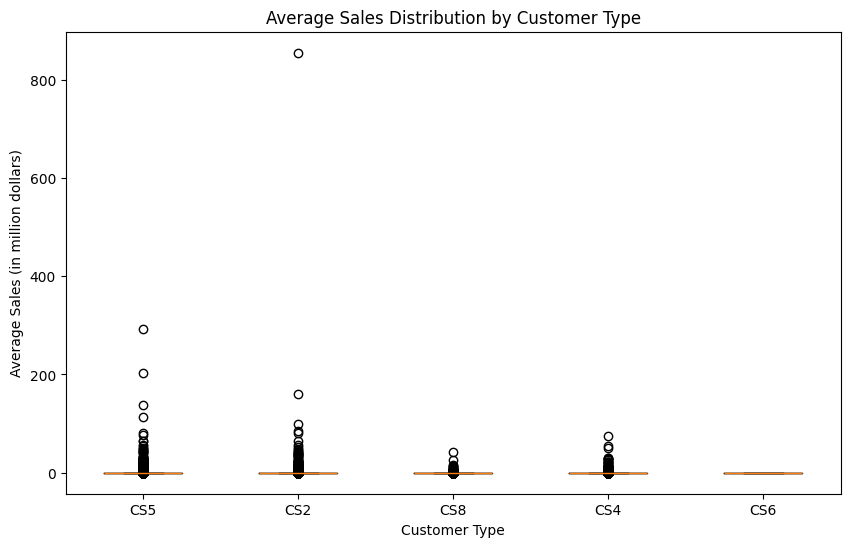

In [38]:
# Insight 5 visualization
plt.figure(figsize=(10, 6))
plt.boxplot([df[df['Customer Segment'] == customer_type]['Total Sales'] for customer_type in avg_sales_per_customer_type.index])
plt.xticks(range(1, len(avg_sales_per_customer_type.index) + 1), avg_sales_per_customer_type.index)
plt.xlabel('Customer Type')
plt.ylabel('Average Sales (in million dollars)')
plt.title('Average Sales Distribution by Customer Type')
plt.yticks([0e8, 200e6, 400e6, 600e6, 800e6], ['0', '200', '400', '600', '800'])
plt.savefig('insight5.png')
plt.show()

In [26]:
# Top 3 actions
high_margin_products = df.groupby('Product Name')['Profit Margin'].mean().nlargest(3)
focus_on_products = high_margin_products.index.tolist()
focus_on_products_profit_margin = high_margin_products.tolist()

marketing_opportunities = df.groupby(['Business Area', 'Country'])['Total Sales'].sum().nlargest(3)
expand_in_continents = marketing_opportunities.index.tolist()
expand_in_continents_sales = marketing_opportunities.tolist()

optimize_customer_groups = df.groupby('Customer Segment')['Total Sales'].sum().nsmallest(3)
improve_for_customer_groups = optimize_customer_groups.index.tolist()
improve_for_customer_groups_sales = optimize_customer_groups.tolist()

# Print top 3 actions with exact values
print("\nTop 3 Actions:")
print("Focus on High-Margin Products:")
for product, margin in zip(focus_on_products, focus_on_products_profit_margin):
    print("- {} (Profit Margin: {:.2f}%)".format(product, margin))

print("\nExpand Marketing Efforts in Continents:")
for continent, sales in zip(expand_in_continents, expand_in_continents_sales):
    print("- {} (Total Sales: ${:.2f})".format(continent, sales))

print("\nImprove Services for Customer Groups:")
for segment, sales in zip(improve_for_customer_groups, improve_for_customer_groups_sales):
    print("- {} (Total Sales: ${:.2f})".format(segment, sales))



Top 3 Actions:
Focus on High-Margin Products:
- Plastic, plastic articles, used (Profit Margin: 86153003.49%)
- Paper (Profit Margin: 95.34%)
- Salmon/Trout, ULT(-60C/-76F), fish (Profit Margin: 94.01%)

Expand Marketing Efforts in Continents:
- ('North AM', 'United States') (Total Sales: $4744022569.39)
- ('North EU', 'United Kingdom') (Total Sales: $1006729332.55)
- ('Far East Asia', 'China') (Total Sales: $794972483.07)

Improve Services for Customer Groups:
- CS6 (Total Sales: $94676.92)
- CS7 (Total Sales: $260408.95)
- CS1 (Total Sales: $349310804.10)


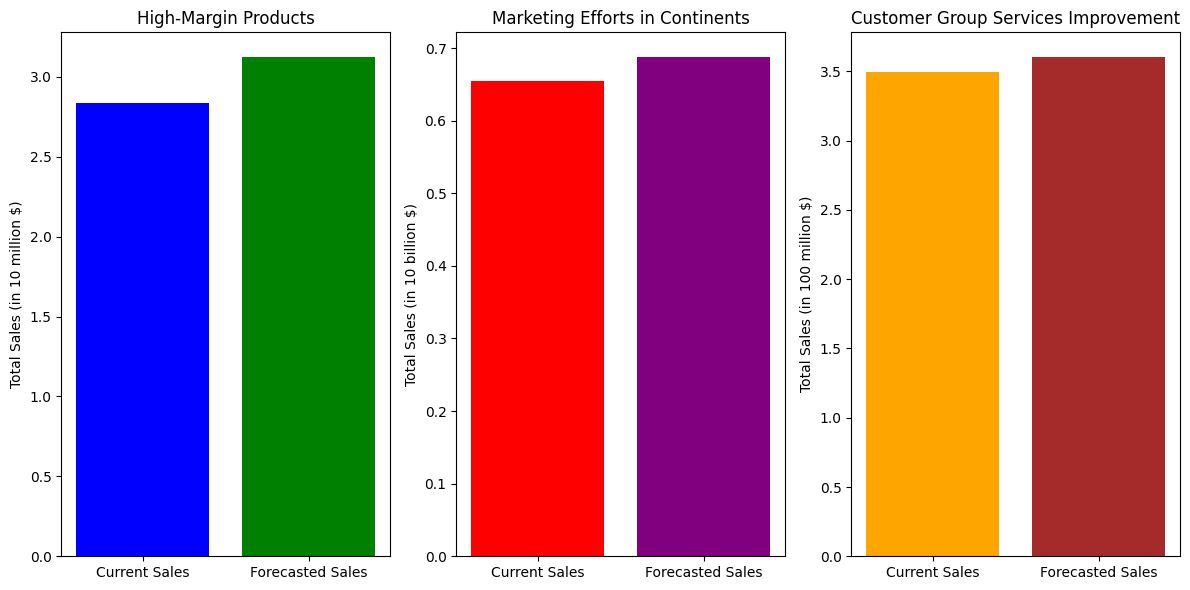

In [39]:
import matplotlib.pyplot as plt
# Assuming growth rates
growth_rate_high_margin_products = 0.10
growth_rate_marketing_continents = 0.05
growth_rate_improve_customer_groups = 0.03

# Forecasted sales for each action
forecast_high_margin_products = df[df['Product Name'].isin(high_margin_products.index)]['Total Sales'].sum() * (1 + growth_rate_high_margin_products)
forecast_marketing_continents = df[df.groupby(['Business Area', 'Country'])['Total Sales'].transform('sum').isin(marketing_opportunities)]['Total Sales'].sum() * (1 + growth_rate_marketing_continents)
forecast_improve_customer_groups = df[df['Customer Segment'].isin(optimize_customer_groups.index)]['Total Sales'].sum() * (1 + growth_rate_improve_customer_groups)

# Calculate current sales for each action
current_high_margin_products = df[df['Product Name'].isin(high_margin_products.index)]['Total Sales'].sum()
current_marketing_continents = df[df.groupby(['Business Area', 'Country'])['Total Sales'].transform('sum').isin(marketing_opportunities)]['Total Sales'].sum()
current_improve_customer_groups = df[df['Customer Segment'].isin(optimize_customer_groups.index)]['Total Sales'].sum()

# Create separate bar charts for each forecast
plt.figure(figsize=(12, 6))
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown']

# High-Margin Products
plt.subplot(1, 3, 1)
plt.bar(['Current Sales', 'Forecasted Sales'], [current_high_margin_products/1e7, forecast_high_margin_products/1e7], color=colors[:2])
plt.title('High-Margin Products')
plt.ylabel('Total Sales (in 10 million $)')

# Marketing Efforts in Continents
plt.subplot(1, 3, 2)
plt.bar(['Current Sales', 'Forecasted Sales'], [current_marketing_continents/1e10, forecast_marketing_continents/1e10], color=colors[2:4])
plt.title('Marketing Efforts in Continents')
plt.ylabel('Total Sales (in 10 billion $)')

# Customer Group Services Improvement
plt.subplot(1, 3, 3)
plt.bar(['Current Sales', 'Forecasted Sales'], [current_improve_customer_groups/1e8, forecast_improve_customer_groups/1e8], color=colors[4:])
plt.title('Customer Group Services Improvement')
plt.ylabel('Total Sales (in 100 million $)')

plt.tight_layout()
plt.savefig('recommend.png')
plt.show()